<a href="https://colab.research.google.com/github/gongx030/Etv2_limb_manuscript/blob/main/Conservation_limb_ATAC_seq_new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is to generate Figure 3A from the Etv2 limb paper




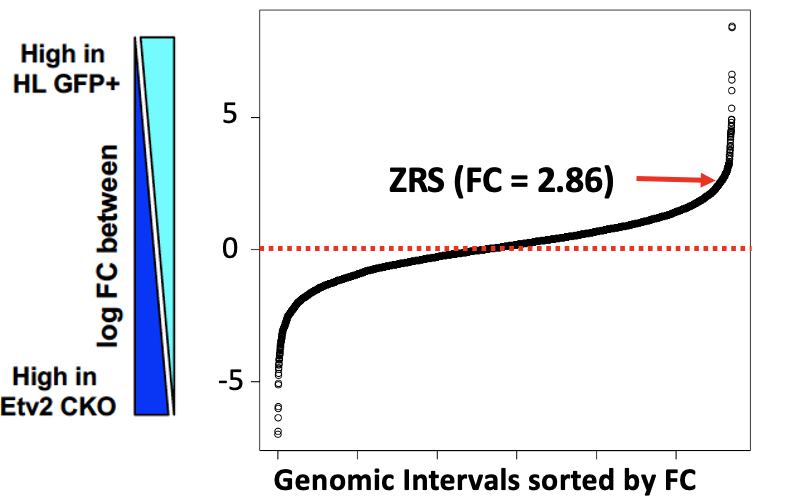

In [ ]:
start_time0 <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 'dplyr', 
  'SummarizedExperiment', 'BSgenome.Mmusculus.UCSC.mm10', 'BiocParallel',
  'gsl','gplots', 'coexnet', 'umap', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db', 'ggplot2', 'ggrepel' 
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.4 (2021-02-15)

Installing package(s) 'BiocVersion', 'SummarizedExperiment',
  'BSgenome.Mmusculus.UCSC.mm10', 'BiocParallel', 'gsl', 'gplots', 'coexnet',
  'umap', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db', 'ggrepel'

also installing the dependencies ‘bit’, ‘XML’, ‘GenomicAlignments’, ‘Rhtslib’, ‘formatR’, ‘gsubfn’, ‘proto’, ‘chron’, ‘bit64’, ‘plogr’, ‘BiocFileCache’, ‘matrixStats’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘Biostrings’, ‘rtracklayer’, ‘Rsamtools’, ‘lambda.r’, ‘futile.options’, ‘bitops’, ‘affyio’, ‘preprocessCore’, ‘zlibbioc’, ‘multtest’, ‘scrime’, ‘png’, ‘sqldf’, ‘plyr’, ‘hash’, ‘plotrix’, ‘infotheo’, ‘RcppEigen’, ‘RSQLite’, ‘biomaRt’, ‘MatrixGenerics’, ‘GenomicRanges’, ‘Biobase’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘DelayedArray’, ‘BSgenome’, ‘futile.logger’, ‘snow’, ‘gtools’, ‘caTools’, ‘affy’, ‘siggenes’, ‘GEOquery’, ‘vsn’, ‘igraph’, ‘acde’, ‘limma’, ‘STRINGdb’, ‘minet’, ‘reticulat

### Install `chromVAR` and `chromVARmotifs`

In [ ]:
devtools::install_github("GuangchuangYu/ChIPseeker")

enrichplot   (NA    -> bc87a35ae...) [GitHub]
farver       (2.0.3 -> 2.1.0       ) [CRAN]
ps           (1.5.0 -> 1.6.0       ) [CRAN]
GO.db        (NA    -> 3.12.1      ) [CRAN]
polyclip     (NA    -> 1.10-0      ) [CRAN]
tweenr       (NA    -> 1.0.1       ) [CRAN]
tidyr        (1.1.2 -> 1.1.3       ) [CRAN]
rvcheck      (NA    -> 0.1.8       ) [CRAN]
ggforce      (NA    -> 0.3.2       ) [CRAN]
gridExtra    (NA    -> 2.3         ) [CRAN]
RcppArmad... (NA    -> 0.10.2.1.0  ) [CRAN]
graphlayouts (NA    -> 0.7.1       ) [CRAN]
tidygraph    (NA    -> 1.2.0       ) [CRAN]
viridis      (NA    -> 0.5.1       ) [CRAN]
fastmatch    (NA    -> 1.1-0       ) [CRAN]
data.table   (NA    -> 1.14.0      ) [CRAN]
reshape2     (NA    -> 1.4.4       ) [CRAN]
qvalue       (NA    -> 2.22.0      ) [CRAN]
GOSemSim     (NA    -> 2.16.1      ) [CRAN]
fgsea        (NA    -> 1.16.0      ) [CRAN]
DO.db        (NA    -> 2.9         ) [CRAN]
shadowtext   (NA    -> 0.0.7       ) [CRAN]
scatterpie   (NA    -> 0.1.5  

tidytree     (NA    -> 0.3.3     ) [CRAN]
ape          (NA    -> 5.4-1     ) [CRAN]
ps           (1.5.0 -> 1.6.0     ) [CRAN]
farver       (2.0.3 -> 2.1.0     ) [CRAN]
patchwork    (NA    -> 1.1.1     ) [CRAN]
RcppArmad... (NA    -> 0.10.2.1.0) [CRAN]
tidyr        (1.1.2 -> 1.1.3     ) [CRAN]
gridExtra    (NA    -> 2.3       ) [CRAN]
polyclip     (NA    -> 1.10-0    ) [CRAN]
tweenr       (NA    -> 1.0.1     ) [CRAN]
reshape2     (NA    -> 1.4.4     ) [CRAN]
GO.db        (NA    -> 3.12.1    ) [CRAN]
fastmatch    (NA    -> 1.1-0     ) [CRAN]
data.table   (NA    -> 1.14.0    ) [CRAN]
treeio       (NA    -> 1.14.3    ) [CRAN]
rvcheck      (NA    -> 0.1.8     ) [CRAN]
aplot        (NA    -> 0.0.6     ) [CRAN]
ggforce      (NA    -> 0.3.2     ) [CRAN]
graphlayouts (NA    -> 0.7.1     ) [CRAN]
tidygraph    (NA    -> 1.2.0     ) [CRAN]
viridis      (NA    -> 0.5.1     ) [CRAN]
qvalue       (NA    -> 2.22.0    ) [CRAN]
GOSemSim     (NA    -> 2.16.1    ) [CRAN]
fgsea        (NA    -> 1.16.0    )

Installing 31 packages: tidytree, ape, ps, farver, patchwork, RcppArmadillo, tidyr, gridExtra, polyclip, tweenr, reshape2, GO.db, fastmatch, data.table, treeio, rvcheck, aplot, ggforce, graphlayouts, tidygraph, viridis, qvalue, GOSemSim, fgsea, DO.db, ggtree, shadowtext, scatterpie, ggraph, DOSE, cowplot

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpO5RfYe/remotes4830ab3940/YuLab-SMU-enrichplot-bc87a35/DESCRIPTION’
─  preparing ‘enrichplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘enrichplot_1.11.2.994.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 26 packages: farver, ps, GO.db, polyclip, tweenr, tidyr, rvcheck, ggforce, gridExtra, RcppArmadillo, graphlayouts, tidygraph, viridis, fastmatch, data.table, reshape2, qvalue, GOSemSim, fgsea, DO.db, shadowtext, scatterpie, ggraph, DOSE, cowplot, TxDb.Hsapiens.UCSC.hg19.knownGene

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'enrichplot' from a github remote, the SHA1 (bc87a35a) has not changed since last install.
  Use `force = TRUE` to force installation



✔  checking for file ‘/tmp/RtmpO5RfYe/remotes487bea1a47/YuLab-SMU-ChIPseeker-ca92e9e/DESCRIPTION’
─  preparing ‘ChIPseeker’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ChIPseeker_1.27.2.tar.gz’ (1.3s)
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Load R packages

In [ ]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(BiocParallel)
register(MulticoreParam(2))
library(SummarizedExperiment)
library(dplyr)
library(gplots)
library(coexnet)
library(rtracklayer)
library(futile.logger)
library(umap)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(ggplot2)
library(ggrepel)
library(ChIPseeker)

Loading required package: BSgenome

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attachi

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")
library(DESeq2)

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.4 (2021-02-15)

Installing package(s) 'DESeq2'

also installing the dependencies ‘xtable’, ‘annotate’, ‘genefilter’, ‘locfit’, ‘geneplotter’


Old packages: 'farver', 'ps', 'tidyr'



## Read the metadata file

In [ ]:
remote_meta_file <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Limb_Metadata.tsv'
local_meta_file <- gsub('https://s3.msi.umn.edu/', './', remote_meta_file)
system(sprintf('wget -x -c -nH %s', remote_meta_file))

In [ ]:
meta <- read.table(local_meta_file, header = TRUE, sep = '\t')
head(meta)

,Name,BAM,BED,BigWig
,<chr>,<chr>,<chr>,<chr>
1,Etv2cKO_10-31-20_S7,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_treat_pileup.bw
2,Etv2cKO_11-07-20_S8,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_treat_pileup.bw
3,Etv2cKO_11-28-20_S9,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_treat_pileup.bw
4,Etv2cKO_12-1-20_S10,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_treat_pileup.bw
5,Etv2cKO_12-9-20_S11,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_treat_pileup.bw
6,LimbWT_1_12-4-20_S12,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_treat_pileup.bw


In [ ]:
meta <- meta[!grepl('Sall|916-', meta$Name),] ##Only keeping the 25 old and 7 new atac seq data 

### Data filtering and renaming the files to keep the naming consistent with the previous script

In [ ]:
meta_name <- gsub('-|_S[0-9]+', '', meta$Name)


In [ ]:
meta_name <- gsub('7[0-9]+_', '', meta_name)
meta_name <- gsub('_[0-9]+', '', meta_name)

In [ ]:
meta_name <- gsub('Etv2_', 'HL_Etv2_', meta_name)
meta_name <- gsub('whole_', '', meta_name)
meta_name <- gsub('ATAC_GFP','Posterior_E10_5',meta_name)
meta_name <- gsub('ATAC_anterior', 'Anterior_E10_5', meta_name)
meta_name <- gsub('ATAC', 'HL_E9_5', meta_name)

In [ ]:
meta_name

[1] "Etv2cKO"             "Etv2cKO"             "Etv2cKO"            
 [4] "Etv2cKO"             "Etv2cKO"             "LimbWT"             
 [7] "LimbWT"              "FL_GFP_neg"          "FL_GFP_pos"         
[10] "HL_GFP_neg"          "HL_GFP_pos"          "HL_Etv2_het"        
[13] "HL_Etv2_CKO"         "HL_Etv2_het"         "HL_Etv2_CKO"        
[16] "HL_Etv2_CKO"         "FL_GFP_neg"          "FL_GFP_pos"         
[19] "HL_GFP_neg"          "HL_GFP_pos"          "FL_GFP_neg"         
[22] "FL_GFP_pos"          "HL_GFP_neg"          "HL_GFP_pos"         
[25] "Etv2CKO_posteriorHL" "Etv2CKO_posteriorHL" "WT_HL"              
[28] "WT_HL"               "Anterior_E10_5"      "HL_E9_5"            
[31] "Posterior_E10_5"     "WT_LPM_NT1"

## Reading bed files to generate a union peak set

In [ ]:
s3_bed <- meta$BED
names(s3_bed) <- meta_name ##using meta data names that were modified

In [ ]:
for (i in 1:length(s3_bed)){
  sprintf('wget -x -c -nH %s', s3_bed[i]) %>% system()
}
s3_bed <- gsub('https://s3.msi.umn.edu/', './', s3_bed)
message(sprintf('all s3_bed exist: %s', all(file.exists(s3_bed))))

all s3_bed exist: TRUE



In [ ]:
gr_list <- lapply(1:length(s3_bed), function(i){
  x <- read.table(s3_bed[i], header = FALSE, sep = '\t')
  gr <- GRanges(seqnames = x[, 1], range = IRanges(x[, 2], x[, 3]), peak_id = x[, 4], score = x[, 5])
  gr$source <- names(s3_bed)[i]
  gr
})

In [ ]:
gr <- Reduce('c', gr_list)
gr <- resize(gr, width = 200, fix = 'center')
gr0 <- reduce(gr) 
mm <- as.matrix(findOverlaps(gr, gr0))
sp <- split(mm[, 1], list(mm[, 2]))
j <- unlist(mclapply(sp, function(i) i[which.max(gr$score[i])], mc.cores = 4))
gr <- gr[j]
G <- do.call('cbind', lapply(1:length(s3_bed), function(i) gr %over% gr_list[[i]]))
gr$group <- G
colnames(gr$group) <- names(s3_bed)
gr

GRanges object with 135211 ranges and 4 metadata columns:
           seqnames            ranges strand |                peak_id     score
              <Rle>         <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1   3191816-3192015      * | /panfs/roc/scratch/d..  11.89920
       [2]     chr1   3400047-3400246      * | /panfs/roc/scratch/d..  13.78180
       [3]     chr1   3647523-3647722      * | /panfs/roc/scratch/d..  14.78840
       [4]     chr1   3649033-3649232      * | /panfs/roc/scratch/d..   5.47637
       [5]     chr1   3651338-3651537      * | /panfs/roc/scratch/d..   9.54477
       ...      ...               ...    ... .                    ...       ...
  [135207]     chrY 90828856-90829055      * | /panfs/roc/scratch/d..  35.17030
  [135208]     chrY 90829716-90829915      * | /panfs/roc/scratch/d..   2.15339
  [135209]     chrY 90835556-90835755      * | /panfs/roc/scratch/d..   8.03207
  [135210]     chrY 90838629-90838828      * | /panfs/roc/scra

In [ ]:
  gr <- gr[!seqnames(gr) %in% c('chrM', 'chrY')]

In [ ]:
blacklist_file <- 'https://s3.msi.umn.edu/gongx030/datasets/datasets=blacklists_version=20190827a/mm10.blacklist.bed.gz'
blacklist <- blacklist_file %>%
  url() %>%
  gzcon() %>%
  readLines() %>%
  textConnection() %>%
  read.table(header = TRUE, sep = '\t')
blacklist <- GRanges(seqnames = blacklist[, 1], range = IRanges(blacklist[, 2], blacklist[, 3]))

gr <- gr[!gr %over% blacklist]
gr ##Union peak set

GRanges object with 134677 ranges and 4 metadata columns:
           seqnames              ranges strand |                peak_id
              <Rle>           <IRanges>  <Rle> |            <character>
       [1]     chr1     3191816-3192015      * | /panfs/roc/scratch/d..
       [2]     chr1     3400047-3400246      * | /panfs/roc/scratch/d..
       [3]     chr1     3647523-3647722      * | /panfs/roc/scratch/d..
       [4]     chr1     3649033-3649232      * | /panfs/roc/scratch/d..
       [5]     chr1     3651338-3651537      * | /panfs/roc/scratch/d..
       ...      ...                 ...    ... .                    ...
  [134673]     chrX 170859281-170859480      * | /panfs/roc/scratch/d..
  [134674]     chrX 170862187-170862386      * | /panfs/roc/scratch/d..
  [134675]     chrX 170865416-170865615      * | /panfs/roc/scratch/d..
  [134676]     chrX 170867099-170867298      * | /panfs/roc/scratch/d..
  [134677]     chrX 170881030-170881229      * | /panfs/roc/scratch/d..
      

## Downloading bigwig files that would be used to generate summarized experiment

In [ ]:
s3_bw <- meta$BigWig
names(s3_bw) <- meta_name

In [ ]:
for (i in 1:length(s3_bw)){
  sprintf('wget -x -c -nH %s', s3_bw[i]) %>% system()
}
s3_bw <- gsub('https://s3.msi.umn.edu/', './', s3_bw)
message(sprintf('all s3_bw exist: %s', all(file.exists(s3_bw))))

all s3_bw exist: TRUE



In [ ]:
X <- do.call('cbind', lapply(s3_bw, function(bw_file){
  flog.info(sprintf('reading %s', bw_file))
	ga <- rtracklayer::import(bw_file, format = 'BigWig')#, which = reduce(peaks))	
  cvg <- coverage(ga, weight = as.numeric(mcols(ga)$score))
  sum(cvg[gr])
}))
se <- SummarizedExperiment(assays = SimpleList(counts = X), rowRanges = gr, colData = names(s3_bw))

INFO [2021-03-03 18:21:16] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_treat_pileup.bw
INFO [2021-03-03 18:22:25] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_treat_pileup.bw
INFO [2021-03-03 18:23:04] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_treat_pileup.bw
INFO [2021-03-03 18:23:45] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_treat_pileup.bw
INFO [2021-03-03 18:23:58] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_treat_pileup.bw
INFO [2021-03-03 18:24:34] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_treat_pileup.bw
INFO [2021-03-03 18:24:58] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_2_12-4-20_S13.dedup_treat_pileup.bw
INFO [2021-03-03 18:25:31] reading ./dsouz072/datasets/dataset=Etv2

In [ ]:
names(colData(se)) <- 'group'

## Normalize the read counts by DESeq2

In [ ]:
dds <- DESeqDataSet(se, design = ~ group)
dds <- estimateSizeFactors(dds)
dds <- DESeq(dds)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = ~group):
“134657 duplicate rownames were renamed by adding numbers”
Warning message in DESeqDataSet(se, design = ~group):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



## Conservation (phastCons)

In [ ]:
phastcon <- c('phastcon_60' <- 'http://hgdownload.cse.ucsc.edu/goldenpath/mm10/phastCons60way/mm10.60way.phastCons.bw')

In [ ]:
for (i in 1:length(phastcon)){
  sprintf('wget -x -c -nH %s', phastcon[i]) %>% system()
}

In [ ]:
res <-	as.data.frame(results(dds, contrast = c('group', 'HL_GFP_pos', 'Etv2CKO_posteriorHL')))
	
	sum(!is.na(res[, 'pvalue']) & res[, 'pvalue'] < res[i[1], 'pvalue'] & res[, 'log2FoldChange'] > 0)
	sum(!is.na(res[, 'pvalue']) & res[, 'log2FoldChange'] > res[i[1], 'log2FoldChange'] & res[, 'pvalue'] < 0.05)
	sum(!is.na(res[, 'padj']) & res[, 'log2FoldChange'] > 2.5 & res[, 'padj'] < 0.05)

[1] 15509

[1] 16378

[1] 1053

In [ ]:
cvg <- import(phastcon, which = rowRanges(dds), as = 'RleList') # the conservation coverage
	phastCons <- mean(cvg[rowRanges(dds)])
	
	sum(!is.na(res[, 'pvalue']) & res[, 'pvalue'] < res[i[1], 'pvalue'] & res[, 'log2FoldChange'] > 0 & phastCons > 0.9)
	sum(!is.na(res[, 'pvalue']) & res[, 'pvalue'] < res[i[1], 'pvalue'] & res[, 'log2FoldChange'] > 2.5 & phastCons > 0.9)

[1] 1062

[1] 157

In [ ]:
dat <- as.data.frame(gr)
dat$GI <- paste(dat$start, dat$end, sep = '-')
dat$GI <- paste(dat$seqnames, dat$GI, sep = ':') #Getting rownames for the res dataframe in the form chr5:29315455-29315466

In [ ]:
j <- !is.na(res[, 'pvalue']) & res[, 'log2FoldChange'] > -10 & res[, 'log2FoldChange'] < 10 & phastCons > 0.9 ##Changing the FC limits as there are a few outliers above 10 

In [ ]:
rownames(res) <- dat$GI ##changing rownames to use genomic intervals format 'chr5:29315271-29315470'

In [ ]:
head(res)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:3191816-3192015,525.5205,-2.046676792,1.2680358,-1.61405280,0.1065160,0.4557335
chr1:3400047-3400246,1052.8089,0.893435868,0.6472572,1.38034124,0.1674816,0.5565482
chr1:3647523-3647722,1688.0585,-0.007753143,0.4295427,-0.01804976,0.9855992,0.9969410
chr1:3649033-3649232,824.3655,0.428929234,0.5666961,0.75689467,0.4491130,0.8014398
chr1:3651338-3651537,1243.0702,-0.039440904,0.6021431,-0.06550088,0.9477752,0.9877033
chr1:3670782-3670981,4506.6573,0.614931320,0.4717705,1.30345430,0.1924197,0.5876748


In [ ]:
res[grepl('chr5:29315271-29315470', rownames(res)),] 

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr5:29315271-29315470,1200.083,2.864074,0.7942672,3.605933,0.0003110336,0.01264354


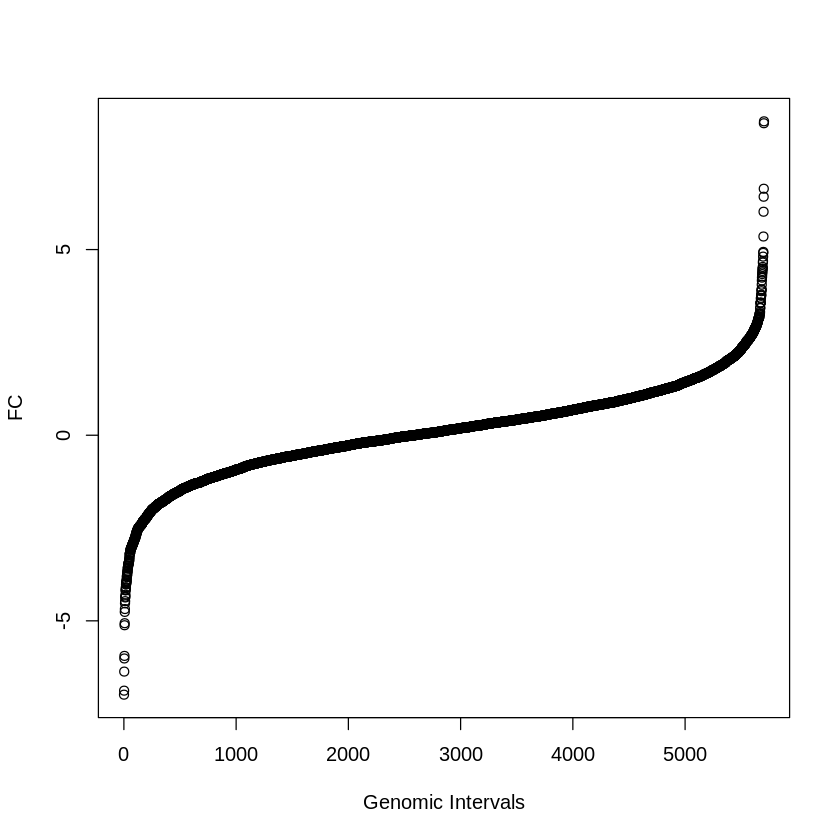

In [ ]:
plot(sort(res[j, 'log2FoldChange']), xlab ='Genomic Intervals', ylab ='FC')

In [ ]:
sessionInfo()

In [ ]:
Sys.time() - start_time0